In [1]:
from jupyterthemes import jtplot
from tensorflow import set_random_seed
set_random_seed(42)
jtplot.style()
# Constantes
SEED = 42
m = 64
tau = 1
delta = 1

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt
from tensorflow.keras import layers
from keras import regularizers
from tensorflow import keras
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [3]:
from Funciones import GenersConjuntos
from Funciones import plot_history

In [4]:
def ModMLP(show=True): # Modelo de la red neuronal a utilizar
    inputs = keras.Input(shape=(m))
    x = layers.Dense(64, activation='sigmoid')(inputs)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(256, activation='relu')(x)
    outputs = layers.Dense(delta, activation='linear')(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name='forecasting')
    
    if(show):
        model.summary()
    
    return model

<h3> Lectura y analisis de la serie de tiempo </h3>

Para comenzar se lee la serie de tiempo desde el archivo csv

In [5]:
TS = pd.read_csv('TimesSeries\Electric_Production.csv')

In [6]:
TS.info() # Se reviza que la serie de tiempo no tenga nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
DATE     397 non-null object
Value    397 non-null float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


La serie de tiempo es tomada desde la columna value

In [7]:
serie = TS.Value
mean = serie.mean()
std = serie.std()

Se pueden revizar su media, su maximo, su minimo, y su promedio

In [8]:
print('Media:', serie.mean())
print('Maximo:', serie.max())
print('Minimo:', serie.min())
print('STD:', serie.std())

Media: 88.84721763224182
Maximo: 129.4048
Minimo: 55.3151
STD: 15.387833664730902


La serie es convertiza a numpy array para un mejor manejo, a su vez es ploteada para observar su forma

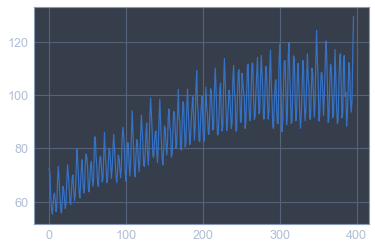

In [9]:
serie = np.array(serie)
plt.plot(serie)
plt.show()

Posteriormente se estandariza la serie y se obtienen los conjuntos de datos con los cuales se ha de entrenar la red

In [10]:
X_train, X_val, X_test, y_train, y_val, y_test=  GenersConjuntos(serie, 0.3, 0.2)

In [11]:
X_val.shape

(47, 64)

<h3> Diseño y entrenamiento de la red neuronal </h3>

In [12]:
model = ModMLP()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "forecasting"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 45,761
Trainable params: 45,761
Non-trainable params: 0
_________________________________________________________________


Una vez que el modelo esta creado se compila y se entrena.

En la compilación se utiliza como funcion de perdida el Error cuadratico medio en convinacion con el gradiente estocastico, el tercer parametro son las metricas en este caso se utilizan el error absoluto medio, el error cuadratico medio y accuracy, aunque la ultima no es una buena referencia cuando se realiza prediccion de series de tiempo (forecasting) es más comun su utilización en clasificación.

In [13]:
model.compile(loss="mean_squared_error", optimizer="sgd", metrics=['mae', 'mse','accuracy'])

In [14]:
callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train,
                    batch_size=64,
                    callbacks=[callback],
                    epochs=1000,
                    validation_data=(X_val, y_val))

test_scores = model.evaluate(X_test, y_test, batch_size=32)
print('Test loss:', test_scores[0])
print('Test mae:', test_scores[1])
print('Test mse:', test_scores[2])
print('Test acc:', test_scores[3])

Train on 186 samples, validate on 47 samples
Epoch 1/2000
186/186 [==============================] - 1s 5ms/sample - loss: 0.6415 - mean_absolute_error: 0.6354 - mean_squared_error: 0.6415 - acc: 0.0000e+00 - val_loss: 0.3774 - val_mean_absolute_error: 0.5154 - val_mean_squared_error: 0.3774 - val_acc: 0.0000e+00
Epoch 2/2000
186/186 [==============================] - 0s 172us/sample - loss: 0.4967 - mean_absolute_error: 0.5729 - mean_squared_error: 0.4967 - acc: 0.0000e+00 - val_loss: 0.3206 - val_mean_absolute_error: 0.4820 - val_mean_squared_error: 0.3206 - val_acc: 0.0000e+00
Epoch 3/2000
186/186 [==============================] - 0s 177us/sample - loss: 0.4266 - mean_absolute_error: 0.5422 - mean_squared_error: 0.4266 - acc: 0.0000e+00 - val_loss: 0.2696 - val_mean_absolute_error: 0.4458 - val_mean_squared_error: 0.2696 - val_acc: 0.0000e+00
Epoch 4/2000
186/186 [==============================] - 0s 166us/sample - loss: 0.3735 - mean_absolute_error: 0.5085 - mean_squared_error: 0.

Epoch 31/2000
186/186 [==============================] - 0s 177us/sample - loss: 0.0797 - mean_absolute_error: 0.2269 - mean_squared_error: 0.0797 - acc: 0.0000e+00 - val_loss: 0.0394 - val_mean_absolute_error: 0.1570 - val_mean_squared_error: 0.0394 - val_acc: 0.0000e+00
Epoch 32/2000
186/186 [==============================] - 0s 161us/sample - loss: 0.0782 - mean_absolute_error: 0.2241 - mean_squared_error: 0.0782 - acc: 0.0000e+00 - val_loss: 0.0404 - val_mean_absolute_error: 0.1644 - val_mean_squared_error: 0.0404 - val_acc: 0.0000e+00
Epoch 33/2000
186/186 [==============================] - 0s 188us/sample - loss: 0.0753 - mean_absolute_error: 0.2201 - mean_squared_error: 0.0753 - acc: 0.0000e+00 - val_loss: 0.0372 - val_mean_absolute_error: 0.1502 - val_mean_squared_error: 0.0372 - val_acc: 0.0000e+00
Epoch 34/2000
186/186 [==============================] - 0s 150us/sample - loss: 0.0719 - mean_absolute_error: 0.2125 - mean_squared_error: 0.0719 - acc: 0.0000e+00 - val_loss: 0.04

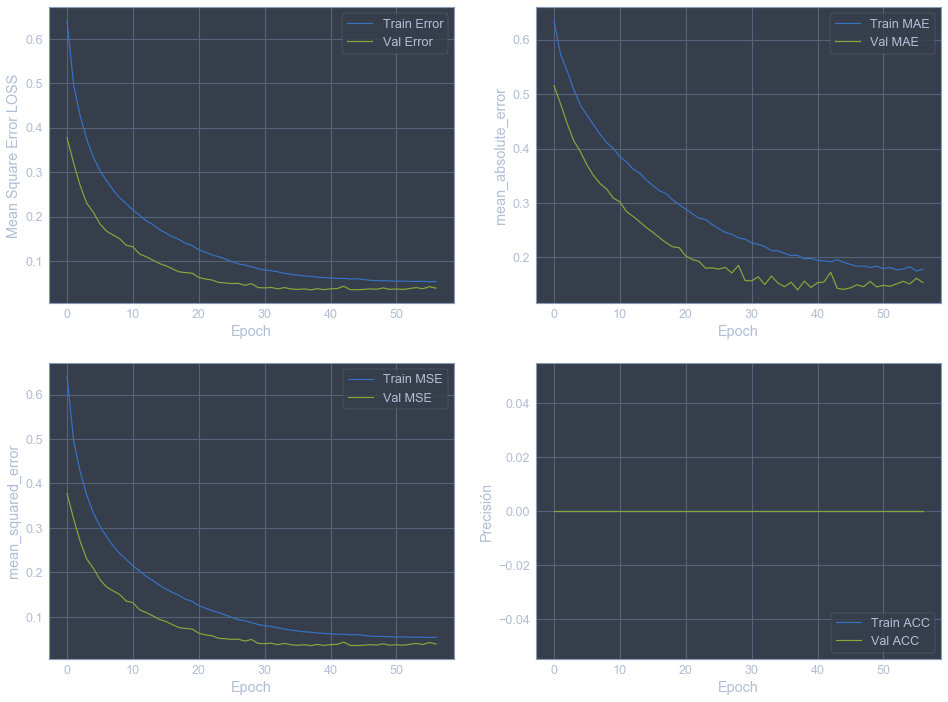

In [15]:
plot_history(history)

Ahora es momento de predecir ya que la red neuronal se encuentra entrenada

In [16]:
y_predic= model.predict(X_test)

Es posible calcular la diferencia entre la prediccion y los datos tomados desde la serie de tiempo

In [17]:
r = y_test - y_predic
ab = abs(r)

Ahora se puede revizar unos datos interesantes

In [18]:
print('Media:', r.mean())
print('Maximo:', ab.max())
print('Minimo:', ab.min())
print('STD:', r.std())

Media: 0.004672809186924993
Maximo: 0.4564329686326989
Minimo: 0.001440801944095793
STD: 0.19968516421728813


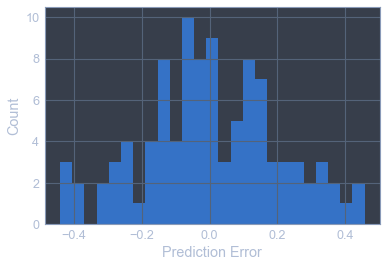

In [19]:
plt.hist(r, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [20]:
Y_inv = y_test*std + mean
Y_pred_inv = y_predic*std + mean

In [21]:
ERR = np.sqrt(mean_squared_error(Y_inv,Y_pred_inv)) 
ERR 

3.073562910636301

In [22]:
print(Y_inv.max())
ERR*100/Y_inv.max()

120.3092497096122


2.554718708706847

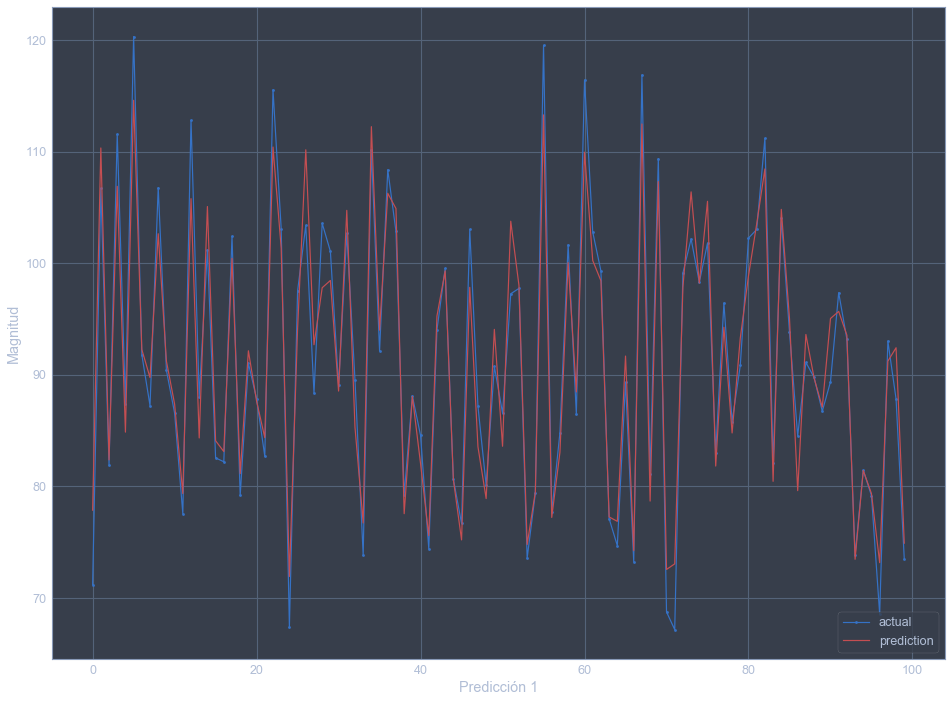

In [23]:
Y_inv = y_test*std + mean
Y_pred_inv = y_predic*std + mean

plt.figure(figsize=(16, 12))
plt.xlabel('Predicción 1')
plt.ylabel('Magnitud')
plt.plot(Y_inv[:, 0],marker='.', label="actual")
plt.plot(Y_pred_inv[:, 0], 'r', label="prediction")
plt.legend(loc="lower right")
plt.show()

<h3>Guardar el modelo entrenado </h3>

In [24]:
#model.save('modelo_serie_electrica3.h5')